# Rolling & Expanding

Rolling is to divide the data into "windows" of time, and then calculate an aggregate function for each window.
Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Data/starbucks.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


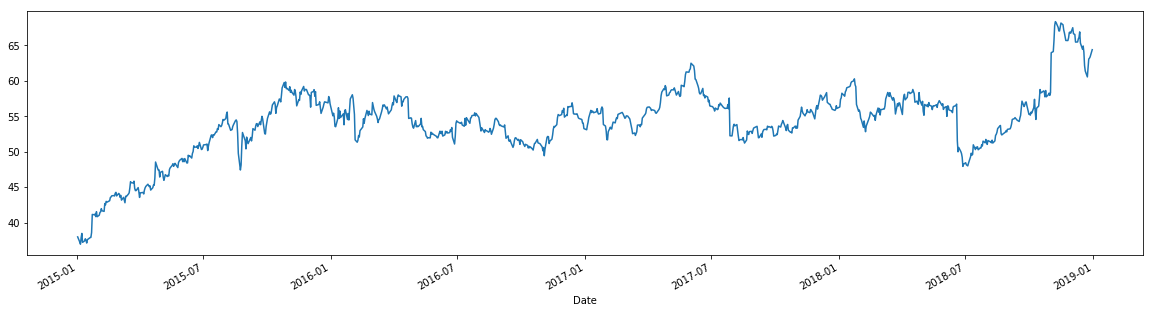

In [4]:
df['Close'].plot(figsize=(20,5))

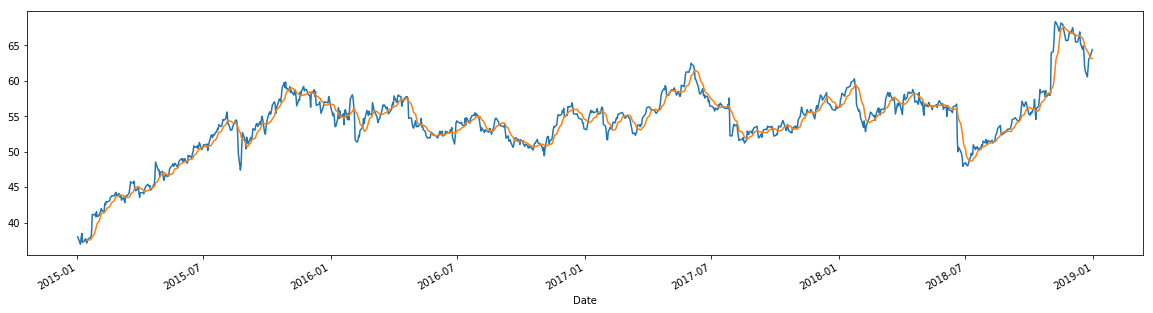

In [5]:
df['Close'].plot(figsize=(20,5))
df.rolling(window=10).mean()['Close'].plot()

In [6]:
df['Close: 30 Day Mean']=df['Close'].rolling(window=30).mean()

In [7]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


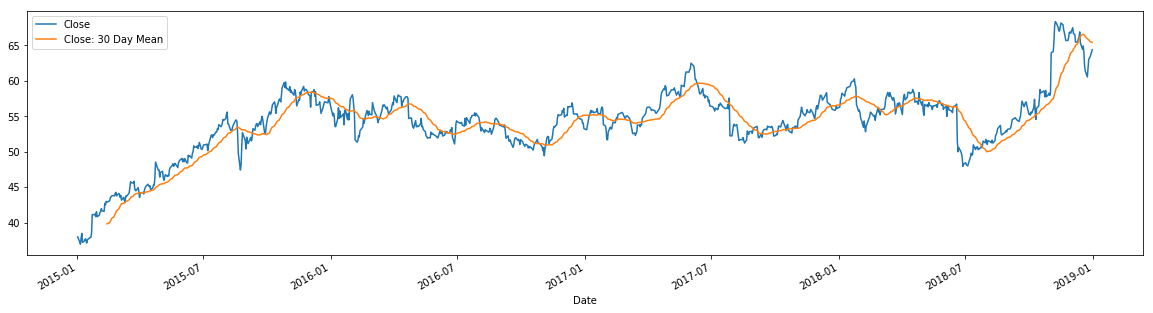

In [8]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(20,5))

In [9]:
df['Close'].expanding().mean()

Date
2015-01-02    38.006100
2015-01-05    37.642100
2015-01-06    37.419667
2015-01-07    37.535950
2015-01-08    37.727980
2015-01-09    37.646000
2015-01-12    37.616786
2015-01-13    37.632200
2015-01-14    37.620856
2015-01-15    37.572580
2015-01-16    37.576782
2015-01-20    37.604200
2015-01-21    37.629731
2015-01-22    37.699950
2015-01-23    37.931300
2015-01-26    38.130813
2015-01-27    38.312894
2015-01-28    38.454650
2015-01-29    38.617958
2015-01-30    38.729470
2015-02-02    38.840586
2015-02-03    38.959055
2015-02-04    39.071500
2015-02-05    39.192921
2015-02-06    39.292636
2015-02-09    39.381438
2015-02-10    39.504604
2015-02-11    39.612446
2015-02-12    39.729569
2015-02-13    39.835057
                ...    
2018-11-15    53.734968
2018-11-16    53.749717
2018-11-19    53.764181
2018-11-20    53.777871
2018-11-21    53.791115
2018-11-23    53.803242
2018-11-26    53.815334
2018-11-27    53.827798
2018-11-28    53.840988
2018-11-29    53.854213
2018-11-30 

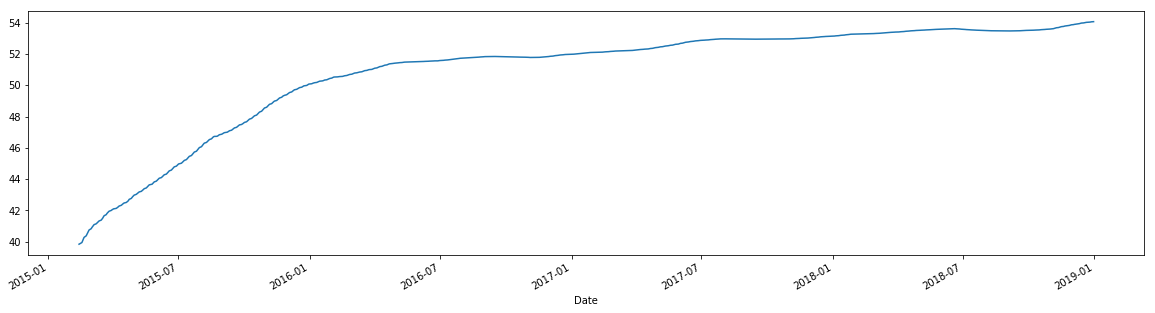

In [12]:
# df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

df['Close'].expanding(min_periods=30).mean().plot(figsize=(20,5));